In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_dataset = pd.read_csv('car.csv')

In [3]:
car_dataset.head()

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,mileage_category,post_day_of_week,vehicle_age
0,Honda N One Premium 2014,2650000,Lahore,2014,82000,Petrol,Automatic,Lahore,Blue,Imported,660,2024-05-04,Medium,Medium,Saturday,10
1,Nissan Note 2020,5400000,Lahore,2020,59000,Hybrid,Automatic,Un-Registered,Silver,Imported,1200,2024-05-04,High,Medium,Saturday,4
2,Suzuki Vitara GLX 1.6 2017,0,Karachi,2017,67000,Petrol,Automatic,Karachi,Grey,Imported,1600,2024-05-04,Low,Medium,Saturday,7
3,Toyota Yaris Cross 2021,7850000,Lahore,2021,41000,Hybrid,Automatic,Un-Registered,Beige,Imported,1500,2024-05-04,High,Low,Saturday,3
4,BMW X1 sDrive18i 2017,10700000,Islamabad,2017,37000,Petrol,Automatic,Islamabad,White,Imported,1500,2024-05-04,High,Low,Saturday,7


In [4]:
car_dataset.shape

(48189, 16)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48189 entries, 0 to 48188
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             48189 non-null  object
 1   price             48189 non-null  int64 
 2   city              48189 non-null  object
 3   model             48189 non-null  int64 
 4   mileage           48189 non-null  int64 
 5   fuel_type         48189 non-null  object
 6   transmission      48189 non-null  object
 7   registered        48189 non-null  object
 8   color             48189 non-null  object
 9   assembly          48189 non-null  object
 10  engine_capacity   48189 non-null  int64 
 11  post_date         48189 non-null  object
 12  price_category    48189 non-null  object
 13  mileage_category  48189 non-null  object
 14  post_day_of_week  48189 non-null  object
 15  vehicle_age       48189 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 5.9+ MB


In [6]:
car_dataset.isnull().sum()

title               0
price               0
city                0
model               0
mileage             0
fuel_type           0
transmission        0
registered          0
color               0
assembly            0
engine_capacity     0
post_date           0
price_category      0
mileage_category    0
post_day_of_week    0
vehicle_age         0
dtype: int64

In [7]:
print(car_dataset.fuel_type.value_counts())
print(car_dataset.registered.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.post_date.value_counts())

fuel_type
Petrol           41818
Hybrid            3700
Diesel            1880
Not Available      791
Name: count, dtype: int64
registered
Islamabad      11457
Lahore         10582
Punjab          6217
Karachi         6166
Sindh           6135
               ...  
Khushab            1
Sibi               1
Jaranwala          1
Swatmingora        1
Dunia Pur          1
Name: count, Length: 95, dtype: int64
transmission
Automatic        29079
Not Available    19109
Manual               1
Name: count, dtype: int64
post_date
2024-05-03    4917
2024-05-01    4226
2024-05-02    3919
2024-04-29    2888
2024-04-30    2778
2024-04-28    2376
2024-04-27    2246
2024-04-25    1862
2024-04-24    1803
2024-04-26    1749
2024-04-23    1742
2024-04-22    1725
2024-04-21    1573
2024-05-08    1546
2024-04-20    1486
2024-04-18    1483
2024-04-17    1414
2024-04-19    1413
2024-04-16    1357
2024-04-15    1255
2024-04-14    1057
2024-04-13     863
2024-04-12     711
2024-04-11     539
2024-05-09     386

In [8]:
car_dataset.drop(columns=['post_date','vehicle_age','post_day_of_week'],inplace = True)

In [9]:
car_dataset

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,price_category,mileage_category
0,Honda N One Premium 2014,2650000,Lahore,2014,82000,Petrol,Automatic,Lahore,Blue,Imported,660,Medium,Medium
1,Nissan Note 2020,5400000,Lahore,2020,59000,Hybrid,Automatic,Un-Registered,Silver,Imported,1200,High,Medium
2,Suzuki Vitara GLX 1.6 2017,0,Karachi,2017,67000,Petrol,Automatic,Karachi,Grey,Imported,1600,Low,Medium
3,Toyota Yaris Cross 2021,7850000,Lahore,2021,41000,Hybrid,Automatic,Un-Registered,Beige,Imported,1500,High,Low
4,BMW X1 sDrive18i 2017,10700000,Islamabad,2017,37000,Petrol,Automatic,Islamabad,White,Imported,1500,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48184,Toyota Prius S 2020,8500000,Peshawar,2020,95000,Hybrid,Automatic,Un-Registered,Super White,Imported,1800,High,Medium
48185,Toyota Corolla GLi Automatic 1.3 VVTi 2019,4211000,Karachi,2019,80793,Petrol,Automatic,Karachi,White,Local,1300,High,Medium
48186,Suzuki Mehran VX Euro II 2017,1130000,Sangla hills,2017,72862,Petrol,Not Available,Lahore,Graphite Grey,Local,796,Low,Medium
48187,Suzuki Baleno Sport 2004,1070000,Lahore,2004,1000,Petrol,Not Available,Lahore,Black,Local,1300,Low,Low


In [10]:
car_dataset

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,price_category,mileage_category
0,Honda N One Premium 2014,2650000,Lahore,2014,82000,Petrol,Automatic,Lahore,Blue,Imported,660,Medium,Medium
1,Nissan Note 2020,5400000,Lahore,2020,59000,Hybrid,Automatic,Un-Registered,Silver,Imported,1200,High,Medium
2,Suzuki Vitara GLX 1.6 2017,0,Karachi,2017,67000,Petrol,Automatic,Karachi,Grey,Imported,1600,Low,Medium
3,Toyota Yaris Cross 2021,7850000,Lahore,2021,41000,Hybrid,Automatic,Un-Registered,Beige,Imported,1500,High,Low
4,BMW X1 sDrive18i 2017,10700000,Islamabad,2017,37000,Petrol,Automatic,Islamabad,White,Imported,1500,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48184,Toyota Prius S 2020,8500000,Peshawar,2020,95000,Hybrid,Automatic,Un-Registered,Super White,Imported,1800,High,Medium
48185,Toyota Corolla GLi Automatic 1.3 VVTi 2019,4211000,Karachi,2019,80793,Petrol,Automatic,Karachi,White,Local,1300,High,Medium
48186,Suzuki Mehran VX Euro II 2017,1130000,Sangla hills,2017,72862,Petrol,Not Available,Lahore,Graphite Grey,Local,796,Low,Medium
48187,Suzuki Baleno Sport 2004,1070000,Lahore,2004,1000,Petrol,Not Available,Lahore,Black,Local,1300,Low,Low


In [11]:
car_dataset.describe()

,price,model,mileage,engine_capacity
count,4.818900e+04,48189.000000,48189.000000,48189.000000
mean,4.300611e+06,2013.690074,90444.885327,1417.805038
std,6.285592e+06,7.511492,85300.588856,715.792743
min,0.000000e+00,1990.000000,1.000000,100.000000
25%,1.689999e+06,2008.000000,36000.000000,1000.000000
50%,3.000000e+06,2016.000000,79192.000000,1300.000000
75%,4.750000e+06,2020.000000,122456.000000,1600.000000
max,1.750000e+08,2024.000000,1000000.000000,15000.000000


In [12]:
arr =car_dataset.groupby('engine_capacity').size()


In [13]:
counts = car_dataset['engine_capacity'].value_counts()
common_engines = counts[counts >= 250].index

car_dataset = car_dataset[car_dataset['engine_capacity'].isin(common_engines)]


In [14]:
car_dataset['engine_capacity'].value_counts()

engine_capacity
1300    8329
1000    7548
1500    6245
660     5575
1800    5527
800     3291
1600    2473
2000    1763
2700     822
796      791
1200     702
2800     661
3000     612
2500     475
2400     355
4600     267
Name: count, dtype: int64

In [15]:
car_dataset.shape

(45436, 13)

In [16]:
car_dataset.describe()

,price,model,mileage,engine_capacity
count,4.543600e+04,45436.000000,45436.000000,45436.000000
mean,4.018932e+06,2013.651356,91652.532397,1367.480324
std,5.121958e+06,7.397840,85472.249623,582.055486
min,0.000000e+00,1990.000000,1.000000,660.000000
25%,1.650000e+06,2009.000000,38000.000000,1000.000000
50%,2.927500e+06,2015.000000,80000.000000,1300.000000
75%,4.600000e+06,2020.000000,123456.000000,1600.000000
max,1.500000e+08,2024.000000,1000000.000000,4600.000000


In [17]:
car_dataset = car_dataset[car_dataset['price'] <=90000000]

In [18]:
car_dataset.shape

(45435, 13)

In [19]:
car_dataset['title'].value_counts()

title
Honda Civic Oriel 1.8 i-VTEC CVT 2018       319
Honda Civic Oriel 1.8 i-VTEC CVT 2017       288
Honda Civic Oriel 1.8 i-VTEC CVT 2021       265
Suzuki Alto VXR 2022                        236
Suzuki Mehran VXR Euro II 2018              215
                                           ... 
Toyota Vitz F Smart Stop Package  2018        1
Honda Civic VTi Oriel Automatic 1.6 1988      1
BMW 5 Series 525i 2009                        1
Daihatsu Charade 1995                         1
Toyota Corona 1988                            1
Name: count, Length: 6702, dtype: int64

In [20]:
car_dataset['title'].value_counts()

title
Honda Civic Oriel 1.8 i-VTEC CVT 2018       319
Honda Civic Oriel 1.8 i-VTEC CVT 2017       288
Honda Civic Oriel 1.8 i-VTEC CVT 2021       265
Suzuki Alto VXR 2022                        236
Suzuki Mehran VXR Euro II 2018              215
                                           ... 
Toyota Vitz F Smart Stop Package  2018        1
Honda Civic VTi Oriel Automatic 1.6 1988      1
BMW 5 Series 525i 2009                        1
Daihatsu Charade 1995                         1
Toyota Corona 1988                            1
Name: count, Length: 6702, dtype: int64

In [21]:
import re

# Remove a 4-digit year at the end of the title (like 2018, 2021)
car_dataset['title'] = car_dataset['title'].str.replace(r'\s+\d{4}$', '', regex=True)


In [22]:
car_dataset[car_dataset['title']=='Suzuki Bolan VX 2011']['model']

Series([], Name: model, dtype: int64)

In [23]:
car_dataset.shape

(45435, 13)

In [24]:
# Step 1: Get value counts of 'title'
title_counts = car_dataset['title'].value_counts()

# Step 2: Keep only titles that appear 20 or more times
common_titles = title_counts[title_counts >= 100].index

# Step 3: Filter the dataset to keep only those rows
car_dataset = car_dataset[car_dataset['title'].isin(common_titles)]


In [25]:
car_dataset.shape

(26818, 13)

In [26]:
car_dataset

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,price_category,mileage_category
5,Honda City Aspire Prosmatec 1.5 i-VTEC,3600000,Karachi,2016,45000,Petrol,Automatic,Karachi,Unlisted,Local,1500,Medium,Low
6,Toyota Corolla Altis Grande X CVT-i 1.8 Beige ...,6475000,Lahore,2022,59500,Petrol,Automatic,Lahore,Super White,Local,1800,High,Medium
8,Honda City Aspire Prosmatec 1.5 i-VTEC,4250000,Karachi,2019,22000,Petrol,Automatic,Karachi,Unlisted,Local,1500,High,Low
9,Honda Civic 1.8 i-VTEC CVT,5200000,Lahore,2019,58000,Petrol,Automatic,Sindh,Burgundy,Local,1800,High,Medium
11,Honda Civic VTi Prosmatec 1.8 i-VTEC,3695000,Lahore,2013,75504,Petrol,Automatic,Lahore,Indigo,Local,1800,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48181,Toyota Vitz F 1.0,2050000,Rawalpindi,2012,98000,Petrol,Automatic,Punjab,Silver,Imported,1000,Low,Medium
48182,Suzuki Mehran VX,675000,Islamabad,2007,100000,Petrol,Not Available,Rawalpindi,Blue,Local,800,Low,Medium
48183,Suzuki Bolan,155000,Depal pur,2020,80000,Petrol,Not Available,Lahore,White,Local,660,Low,Medium
48185,Toyota Corolla GLi Automatic 1.3 VVTi,4211000,Karachi,2019,80793,Petrol,Automatic,Karachi,White,Local,1300,High,Medium


In [27]:
car_dataset['title'].value_counts()

car_dataset

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,price_category,mileage_category
5,Honda City Aspire Prosmatec 1.5 i-VTEC,3600000,Karachi,2016,45000,Petrol,Automatic,Karachi,Unlisted,Local,1500,Medium,Low
6,Toyota Corolla Altis Grande X CVT-i 1.8 Beige ...,6475000,Lahore,2022,59500,Petrol,Automatic,Lahore,Super White,Local,1800,High,Medium
8,Honda City Aspire Prosmatec 1.5 i-VTEC,4250000,Karachi,2019,22000,Petrol,Automatic,Karachi,Unlisted,Local,1500,High,Low
9,Honda Civic 1.8 i-VTEC CVT,5200000,Lahore,2019,58000,Petrol,Automatic,Sindh,Burgundy,Local,1800,High,Medium
11,Honda Civic VTi Prosmatec 1.8 i-VTEC,3695000,Lahore,2013,75504,Petrol,Automatic,Lahore,Indigo,Local,1800,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48181,Toyota Vitz F 1.0,2050000,Rawalpindi,2012,98000,Petrol,Automatic,Punjab,Silver,Imported,1000,Low,Medium
48182,Suzuki Mehran VX,675000,Islamabad,2007,100000,Petrol,Not Available,Rawalpindi,Blue,Local,800,Low,Medium
48183,Suzuki Bolan,155000,Depal pur,2020,80000,Petrol,Not Available,Lahore,White,Local,660,Low,Medium
48185,Toyota Corolla GLi Automatic 1.3 VVTi,4211000,Karachi,2019,80793,Petrol,Automatic,Karachi,White,Local,1300,High,Medium


In [28]:
arr = car_dataset['title'].unique()


In [29]:
arr

array(['Honda City Aspire Prosmatec 1.5 i-VTEC',
       'Toyota Corolla Altis Grande X CVT-i 1.8 Beige Interior',
       'Honda Civic 1.8 i-VTEC CVT',
       'Honda Civic VTi Prosmatec 1.8 i-VTEC', 'Suzuki Alto VXL AGS',
       'Honda City i-DSI', 'Suzuki Alto VXR', 'DFSK Glory 580 Pro',
       'Honda Civic VTi Oriel 1.6', 'Suzuki Cultus VXRi', 'Suzuki Alto',
       'Toyota Vitz F 1.0', 'Honda Vezel Hybrid Z',
       'Toyota Corolla GLi 1.3 VVTi', 'Nissan Sunny', 'Toyota Aqua S',
       'Honda Civic Oriel 1.8 i-VTEC CVT', 'Suzuki Wagon R VXL',
       'Honda City 1.3 i-VTEC', 'Mercedes Benz C Class C180',
       'Suzuki Cultus EURO II',
       'Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC',
       'Toyota Yaris ATIV CVT 1.3', 'Honda City Aspire 1.5 i-VTEC',
       'Honda City 1.2L CVT', 'Toyota Corolla', 'Suzuki Alto VXR (CNG)',
       'Toyota Corolla XLi VVTi', 'Suzuki Mehran VXR Euro II',
       'Honda City 1.3 i-VTEC Prosmatec',
       'Toyota Corolla Altis Grande X CVT-i 1.8 Black Int

In [30]:
car_dataset.groupby('price_category')['price'].min()


price_category
High      4001000
Low             0
Medium    2215000
Name: price, dtype: int64

In [31]:
car_dataset.groupby('price_category')['price'].max()


price_category
High      78500000
Low        2200000
Medium     4000000
Name: price, dtype: int64

In [32]:
new_dataset = car_dataset.copy()
new_dataset.drop(columns=['mileage_category'], inplace=True)

# Assuming the column you want to rename is currently named 'price_category'
new_dataset.rename(columns={
    'age':'Model_year',
    'price_category': 'original price of that specific model'
    
    
}, inplace=True)




In [33]:
new_dataset['transmission'] = new_dataset['transmission'].replace({
    'Not Available': 'Manual',
})
new_dataset

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,original price of that specific model
5,Honda City Aspire Prosmatec 1.5 i-VTEC,3600000,Karachi,2016,45000,Petrol,Automatic,Karachi,Unlisted,Local,1500,Medium
6,Toyota Corolla Altis Grande X CVT-i 1.8 Beige ...,6475000,Lahore,2022,59500,Petrol,Automatic,Lahore,Super White,Local,1800,High
8,Honda City Aspire Prosmatec 1.5 i-VTEC,4250000,Karachi,2019,22000,Petrol,Automatic,Karachi,Unlisted,Local,1500,High
9,Honda Civic 1.8 i-VTEC CVT,5200000,Lahore,2019,58000,Petrol,Automatic,Sindh,Burgundy,Local,1800,High
11,Honda Civic VTi Prosmatec 1.8 i-VTEC,3695000,Lahore,2013,75504,Petrol,Automatic,Lahore,Indigo,Local,1800,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
48181,Toyota Vitz F 1.0,2050000,Rawalpindi,2012,98000,Petrol,Automatic,Punjab,Silver,Imported,1000,Low
48182,Suzuki Mehran VX,675000,Islamabad,2007,100000,Petrol,Manual,Rawalpindi,Blue,Local,800,Low
48183,Suzuki Bolan,155000,Depal pur,2020,80000,Petrol,Manual,Lahore,White,Local,660,Low
48185,Toyota Corolla GLi Automatic 1.3 VVTi,4211000,Karachi,2019,80793,Petrol,Automatic,Karachi,White,Local,1300,High


In [34]:
new_dataset['transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ['color', 'assembly', 'fuel_type', 'transmission', 'registered',
          'city', 'title','original price of that specific model']

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    new_dataset[col] = le.fit_transform(new_dataset[col].astype(str))
    label_encoders[col] = le


In [36]:
new_dataset

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,original price of that specific model
5,14,3600000,122,2016,45000,3,0,28,290,1,1500,2
6,76,6475000,153,2022,59500,3,0,35,275,1,1800,0
8,14,4250000,122,2019,22000,3,0,28,290,1,1500,0
9,18,5200000,153,2019,58000,3,0,65,37,1,1800,0
11,28,3695000,153,2013,75504,3,0,35,121,1,1800,2
...,...,...,...,...,...,...,...,...,...,...,...,...
48181,95,2050000,224,2012,98000,3,0,55,250,0,1000,1
48182,57,675000,95,2007,100000,3,1,58,24,1,800,1
48183,46,155000,44,2020,80000,3,1,35,300,1,660,1
48185,81,4211000,122,2019,80793,3,0,28,300,1,1300,0


In [37]:
label_encoders

{'color': LabelEncoder(),
 'assembly': LabelEncoder(),
 'fuel_type': LabelEncoder(),
 'transmission': LabelEncoder(),
 'registered': LabelEncoder(),
 'city': LabelEncoder(),
 'title': LabelEncoder(),
 'original price of that specific model': LabelEncoder()}

In [38]:
car_dataset.to_csv("clean_data.csv")

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Separate features and target
X = new_dataset.drop('price', axis=1)
y = new_dataset['price']

# Step 2: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Squared Error: {mse:.2f}")
print(f"✅ R² Score: {r2:.4f}")


✅ Mean Squared Error: 339305758720.00
✅ R² Score: 0.9857


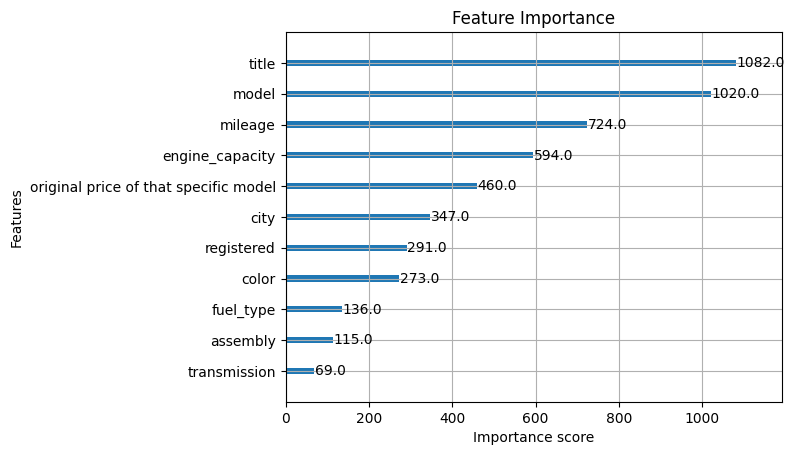

In [40]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()

In [57]:
import optuna

In [41]:
import pickle

# 1. Dump the trained XGBoost model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# 2. Dump all LabelEncoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# 3. Dump feature column names
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)


In [43]:
car_dataset['engine_capacity'].unique()

array([1500, 1800,  660, 1300, 1000, 1600, 1200,  800, 2000, 4600, 2700,
       2800,  796, 2500, 3000, 2400])